#### Table of Content
1. Import Packages
2. Load Dataset
3. Data Preparation
4. EDA
     - 4.1 Final Grade Distribution
     - 4.2 Correlation Heatmap
     - 4.3 Romantic Status
     - 4.4 Alcohol Consumption
     - 4.5 Parents Education Level
     - 4.6 Frequency Of Going Out
     - 4.7 Desire Of Higher Education
     - 4.8 Urban Vs. Rural Students
5. Classification
     - 5.1 Prepare Dataset For Modelling
     - 5.2 Decision Tree Classifier
     - 5.3 Random Forest Classifier
     - 5.4 Support Vector Classifier
     - 5.5 Logistic Regression Classifier
     - 5.6 Ada Boost Classifier
     - 5.7 Sochastic Gradient Descent Classifier
     - 5.8 Model Selection
6. Summary

## 1. Import Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm

## 2. Load Dataset

In [ ]:
# load datasets for two subjects, Math and Portuguese
mat = pd.read_csv("student-mat.csv", sep=';')
por = pd.read_csv("student-por.csv", sep=';')

## 3. Data Preparation

In [ ]:
# merge datasets
df = pd.concat([mat,por])

In [ ]:
# rename column labels
df.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','period1_score','period2_score','final_score']

In [ ]:
# convert final_score to categorical variable # Good:15~20 Fair:10~14 Poor:0~9
df['final_grade'] = 'na'
df.loc[(df.final_score >= 15) & (df.final_score <= 20), 'final_grade'] = 'good' 
df.loc[(df.final_score >= 10) & (df.final_score <= 14), 'final_grade'] = 'fair' 
df.loc[(df.final_score >= 0) & (df.final_score <= 9), 'final_grade'] = 'poor' 
df

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,fair
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,good
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,fair
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,good
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,poor
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,fair


  # Let's have a look at the variables!

In [ ]:
# look for missing values
df.isnull().any()

school                   False
sex                      False
age                      False
address                  False
family_size              False
parents_status           False
mother_education         False
father_education         False
mother_job               False
father_job               False
reason                   False
guardian                 False
commute_time             False
study_time               False
failures                 False
school_support           False
family_support           False
paid_classes             False
activities               False
nursery                  False
desire_higher_edu        False
internet                 False
romantic                 False
family_quality           False
free_time                False
go_out                   False
weekday_alcohol_usage    False
weekend_alcohol_usage    False
health                   False
absences                 False
period1_score            False
period2_score            False
final_sc

#  There is no missing values!


# 4. Exploratory Data Analysis

### 4.1 Final Grade Distribution

Text(0, 0.5, 'Number of Student')

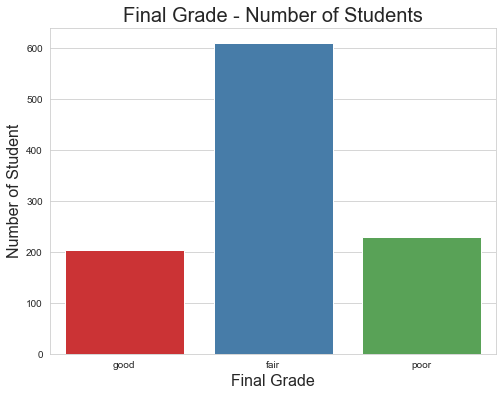

In [ ]:
# Final Grade Countplot
plt.figure(figsize=(8,6))
sns.countplot(df.final_grade, order=["good","fair","poor"], palette='Set1')
plt.title('Final Grade - Number of Students',fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Number of Student', fontsize=16)

###        

-------------------------------------------------------------------------------------------------------------------------------

### 4.2 Correlation Heatmap

Text(0.5, 1, 'Correlation Heatmap')

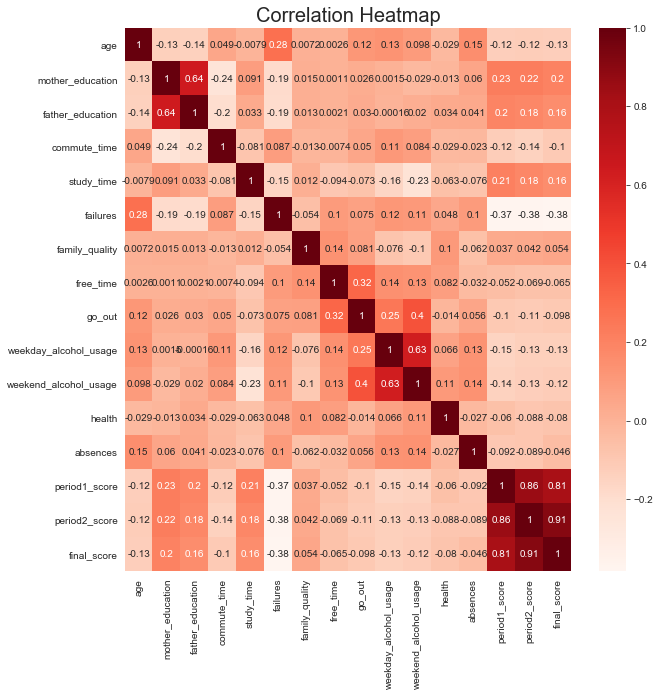

In [ ]:
# see correlation between variables through a correlation heatmap
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

# 5. Classification
### Use Students' Information To Predict Their Final Grade

### 5.1 Prepare Dataset for Modelling

In [ ]:
# create dataframe dfd for classification
dfd = df.copy()
dfd = dfd.drop([ 'final_score'], axis=1)

In [ ]:
dfd.describe()

In [ ]:
# label encode final_grade
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dfd.final_grade = le.fit_transform(dfd.final_grade)

In [ ]:
# dataset train_test_split
from sklearn.model_selection import train_test_split
X = dfd.drop('final_grade',axis=1)
y = dfd.final_grade
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
# get dummy varibles 
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [ ]:
# see total number of features
len(list(X_train))

58

### 5.2 Decision Tree Classification

In [ ]:
# find the optimal # of minimum samples leaf
from sklearn.tree import DecisionTreeClassifier

msl=[]
for i in range(1,58):
    tree = DecisionTreeClassifier(min_samples_leaf=i)
    t= tree.fit(X_train, y_train)
    ts=t.score(X_test, y_test)
    msl.append(ts)
msl = pd.Series(msl)
msl.where(msl==msl.max()).dropna()

8     0.866242
39    0.866242
40    0.866242
41    0.866242
42    0.866242
43    0.866242
44    0.866242
45    0.866242
46    0.866242
47    0.866242
48    0.866242
49    0.866242
50    0.866242
51    0.866242
52    0.866242
53    0.866242
54    0.866242
55    0.866242
56    0.866242
dtype: float64

In [ ]:
# final model
tree = DecisionTreeClassifier(min_samples_leaf=17)
t= tree.fit(X_train, y_train)
print("Decision Tree Model Score" , ":" , t.score(X_train, y_train) , "," , 
      "Test set Score" ,":" , t.score(X_test, y_test))

Decision Tree Model Score : 0.9027397260273973 , Test set Score : 0.8503184713375797


### 5.3 Random Forest Classification

In [ ]:
# find a good # of estimators
from sklearn.ensemble import RandomForestClassifier

ne=[]
for i in range(1,58):
    forest = RandomForestClassifier()
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

4     0.888535
43    0.888535
51    0.888535
dtype: float64

In [ ]:
# find a good # of min_samples_leaf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


ne=[]
for i in range(1,58):
    forest = RandomForestClassifier(n_estimators=36, min_samples_leaf=i)
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

0    0.875796
3    0.875796
dtype: float64

In [ ]:
# final model
forest = RandomForestClassifier(n_estimators=36, min_samples_leaf=2)
f = forest.fit(X_train, y_train)
print("Random Forest Model Score" , ":" , f.score(X_train, y_train) , "," ,
      "Test Score" ,":" , f.score(X_test, y_test))

# Make predictions for the test set
y_pred_test = forest.predict(X_test)

# View accuracy score
print("Accuracy: ", accuracy_score(y_test, y_pred_test))

# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test))

Random Forest Model Score : 0.9739726027397261 , Test Score : 0.8757961783439491
Accuracy:  0.8757961783439491
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       179
           1       0.90      0.90      0.90        67
           2       0.92      0.69      0.79        68

    accuracy                           0.88       314
   macro avg       0.89      0.84      0.86       314
weighted avg       0.88      0.88      0.87       314



### 5.4 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg',fit_intercept=True)

In [ ]:
# find optimal # of features to use in the model
from sklearn.feature_selection import SelectKBest, chi2

ks=[]
for i in range(1,58):
    sk = SelectKBest(chi2, k=i)
    x_new = sk.fit_transform(X_train,y_train)
    x_new_test=sk.fit_transform(X_test,y_test)
    l = lr.fit(x_new, y_train)
    ll = l.score(x_new_test, y_test)
    ks.append(ll)  
    
ks = pd.Series(ks)
ks = ks.reindex(list(range(1,58)))
ks

1     0.878981
2     0.878981
3     0.885350
4     0.888535
5     0.882166
6     0.875796
7     0.872611
8     0.866242
9     0.875796
10    0.878981
11    0.216561
12    0.866242
13    0.853503
14    0.216561
15    0.216561
16    0.216561
17    0.216561
18    0.872611
19    0.869427
20    0.859873
21    0.853503
22    0.859873
23    0.856688
24    0.878981
25    0.872611
26    0.875796
27    0.866242
28    0.843949
29    0.598726
30    0.630573
31    0.563694
32    0.614650
33    0.601911
34    0.207006
35    0.207006
36    0.210191
37    0.722930
38    0.691083
39    0.691083
40    0.834395
41    0.815287
42    0.815287
43    0.216561
44    0.216561
45    0.847134
46    0.840764
47    0.850318
48    0.872611
49    0.617834
50    0.608280
51    0.640127
52    0.678344
53    0.671975
54    0.652866
55    0.847134
56    0.850318
57         NaN
dtype: float64

Text(0, 0.5, 'Prediction Accuracy')

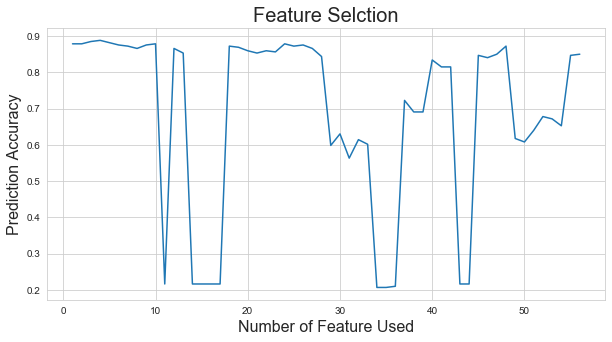

In [ ]:
plt.figure(figsize=(10,5))
ks.plot.line()
plt.title('Feature Selction', fontsize=20)
plt.xlabel('Number of Feature Used', fontsize=16)
plt.ylabel('Prediction Accuracy', fontsize=16)

In [ ]:
ks.where(ks==ks.max()).dropna()

4    0.888535
dtype: float64

In [ ]:
# final model
sk = SelectKBest(chi2, k=8)
x_new = sk.fit_transform(X_train,y_train)
x_new_test=sk.fit_transform(X_test,y_test)
lr = lr.fit(x_new, y_train)
print("Logistic Regression Model Accuracy" , ":" , lr.score(x_new, y_train))

# Make predictions for the test set
y_pred_test = lr.predict(x_new)

# View accuracy score
print("Accuracy: ", accuracy_score(y_train, y_pred_test))

# View confusion matrix for test data and predictions
confusion_matrix(y_train, y_pred_test)



Logistic Regression Model Accuracy : 0.8904109589041096
Accuracy:  0.8904109589041096


array([[398,  13,  20],
       [ 12, 125,   0],
       [ 35,   0, 127]], dtype=int64)

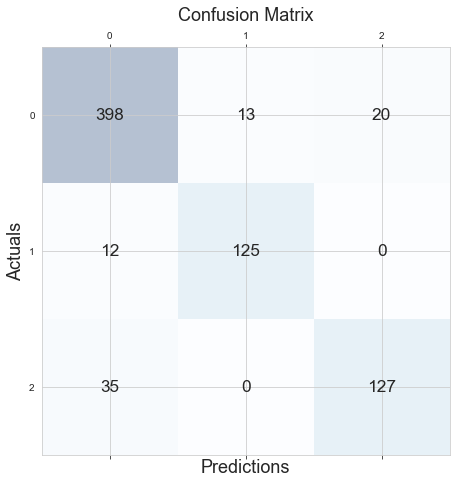

In [ ]:
conf_matrix = confusion_matrix(y_train,y_pred_test)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
#0=good, 1=fair, 2=poor 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()